# Team P - Big Data Challenge Project

# Story of a Day

# How have our days changed as the country locked down? What effects did this have on energy, transport and the environment?

In [10]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import sys
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 8]
sns.set_style('whitegrid')
palette = sns.color_palette("muted")

## What was the severity of the measures in place?

To assess the level of restrictions in place we use the **Stringency Data** from [Oxford Covid-19 Government Response Tracker data](https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/index_stringency.csv). As well as this it is important to understand the different measures put in place at different times:
- **Lockdown Starts**: 23rd March 2020 ~ Lockdown measures in place requiring people to stay at home except for limited purposes. This came 3 days afters schools, indoor leisure, food, entertainment and hospitality facilities closed.
- **1st Lockdown Easing**: 13th May 2020 ~ Workers who can't work from home should go back if their workplace is open and people can now travel to exercise.
- **2nd Lockdown Easing**: 1st June 2020 ~ Some primary schools open for some years and people can meet outdoors in groups of up to 6 people.
- **3rd Lockdown Easing**: 15th June 2020 ~ Non-essential shops open and other easing of measures.
- **4th Lockdown Easing**: 1st August 2020 ~ Restaurants, pubs and cafes open as well as many other facilties that were forced to close. 

### Import Stringency Data

In [11]:
stringency_data = pd.read_excel('data/index_stringency_clean.xlsx')

### Plot Stringecy Data

Text(0.5, 1.0, 'Stringency Index in the UK')

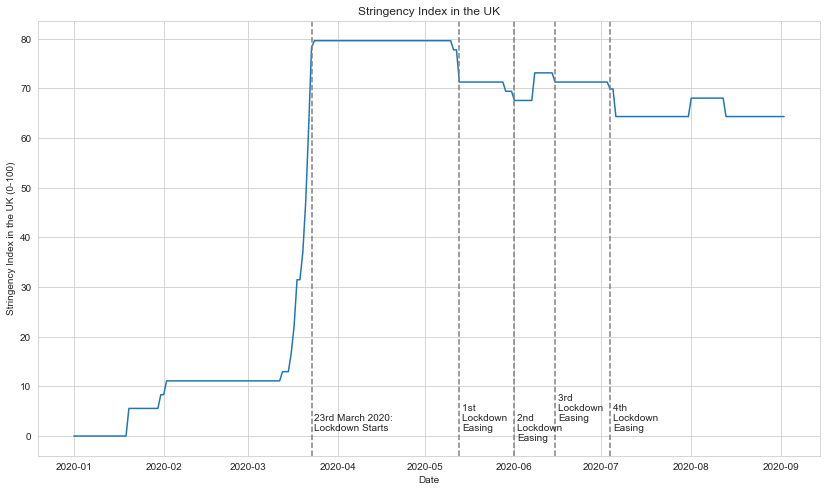

In [12]:
plt.plot(stringency_data['Date'], stringency_data['Stringency'])

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 1, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 1, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), -1, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 3, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 1, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Stringency Index in the UK (0-100)')
plt.title("Stringency Index in the UK")

# Spending our time at home: How has energy demand and supply changed?

## Energy Demand Analysis

Electricity as part of energy demand is a useful analysis to look at in order to determine how Covid-19 has caused behaviour changes which have impacted the environment as well as the economy. Here, we look at how energy demand is distributed during the week, how this has changed post-Covid as well as changes to who consumers are. 

#### Rolling System Demand

Here, we consider the effect of the lockdown on Rolling System Demand for electricity in the UK. The data comes from BMReports, which records daily Rolling System Demand for the UK. 

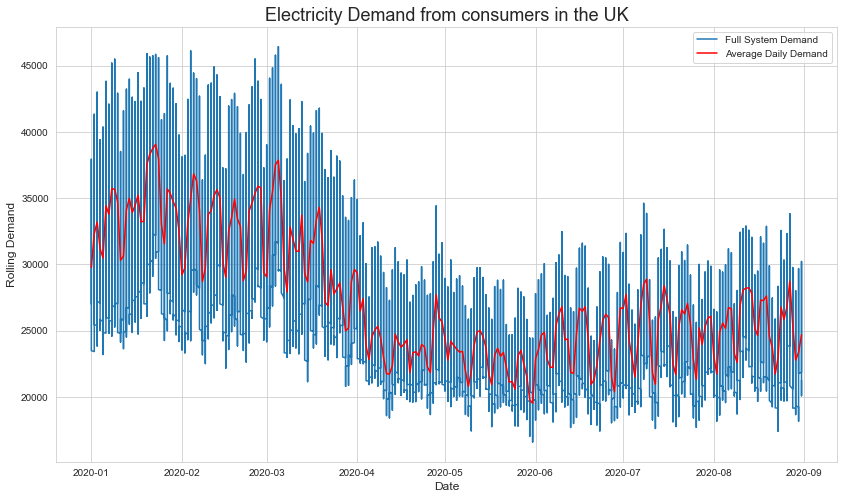

In [46]:
demand_full = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'demand_full')
demand_daily = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'demand_daily')

plt.plot(demand_full['Date'],demand_full['Demand'],label='Full System Demand')
plt.plot(demand_daily['Date'],demand_daily['avdemand'],label='Average Daily Demand', color='red')

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Rolling Demand', fontsize = 12)
plt.title('Electricity Demand from consumers in the UK', fontsize = 18)
plt.legend()

Average daily demand has decreased since before lockdown, with the range of demand also decreasing during the day as represented by the Full System Demand in blue. This indicates smaller peaks in demand during the day. Total demand has increased slightly since March, although average demand has not returned to pre-Covid levels, rather appears to hover around a new mean.

#### The Stringency Index versus UK Electricity Demand

We now consider the Stringency Index versus Rolling System Demand in the UK. The Stringency Index measures the severity of lockdown.

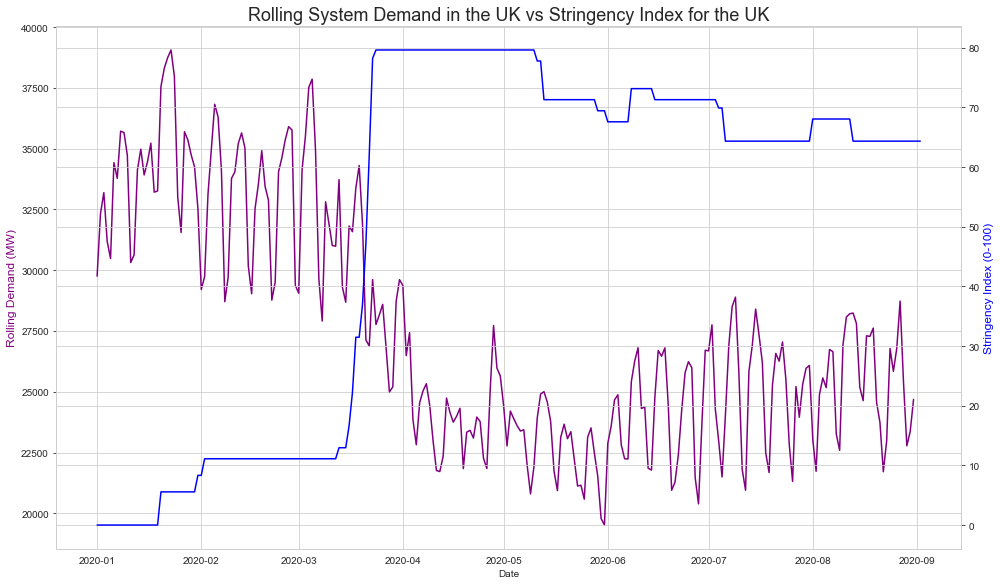

In [47]:
fig, ax1 = plt.subplots()
ax1.plot(demand_daily['Date'],demand_daily['avdemand'],c='purple')
ax1.set_ylabel('Rolling Demand (MW)',c='purple', fontsize = 12)
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

stringency_dataset = pd.read_excel('data/stringency_dataset.xlsx', sheet_name='index_stringency')
ax2.plot(stringency_dataset['Date'], stringency_dataset['Index'],c='blue')
ax2.set_ylabel('Stringency Index (0-100)',c='blue', fontsize = 12)

fig.tight_layout()
plt.title('Rolling System Demand in the UK vs Stringency Index for the UK', fontsize = 18)
plt.show()

As can be seen in the graph above, the effect of lockdown on total energy demand was an immediate reduction from previous levels. Since March 23rd (date of full lockdown) there has been a gradual increase in energy demand nationally however it has not reached pre-Covid levels. This is likely because many businesses are not able to operate or are operating at a reduced capacity. 

### A Deeper look at Demand 

#### Who is consuming energy? 

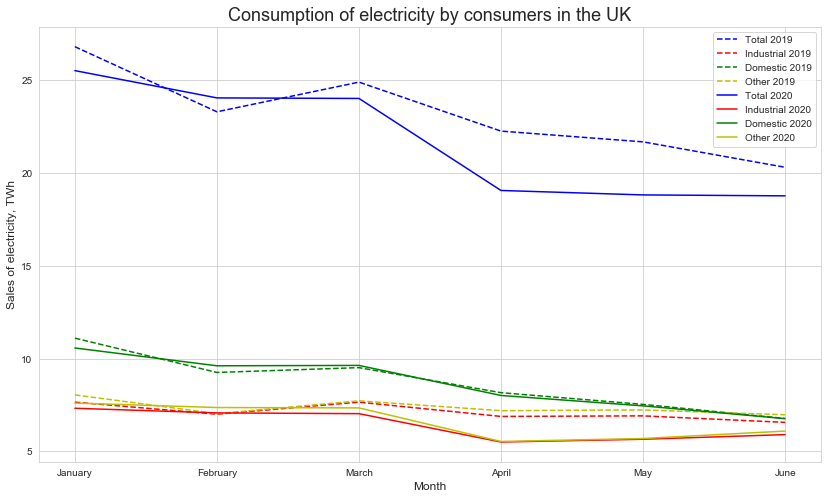

In [43]:
av_consumption = pd.read_excel('data/CFG1.xls', sheet_name = 'Month')
plt.plot(av_consumption['Month'][0:6],av_consumption['Total'][0:6], label='Total 2019',color='b',ls='--')
plt.plot(av_consumption['Month'][0:6],av_consumption['Industrial'][0:6], label='Industrial 2019',color='r',ls='--')
plt.plot(av_consumption['Month'][0:6],av_consumption['Domestic'][0:6], label='Domestic 2019',color='g',ls='--')
plt.plot(av_consumption['Month'][0:6],av_consumption['Other'][0:6], label='Other 2019',color='y',ls='--')

plt.plot(av_consumption['Month'][12:18],av_consumption['Total'][12:18], label='Total 2020',color='b')
plt.plot(av_consumption['Month'][12:18],av_consumption['Industrial'][12:18], label='Industrial 2020',color='r')
plt.plot(av_consumption['Month'][12:18],av_consumption['Domestic'][12:18], label='Domestic 2020',color='g')
plt.plot(av_consumption['Month'][12:18],av_consumption['Other'][12:18], label='Other 2020',color='y')

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales of electricity, TWh', fontsize = 12)
plt.title('Consumption of electricity by consumers in the UK', fontsize = 18)
plt.legend()

There has been a decrease in Industrial and Other electricity demand however that for Domestic consumption has remained somewhat constant. 

## Energy Supply Analysis

How is the supply of energy made up? And how has this changed since Covid-19 and lockdown. In determining the effect of Covid-19 on the environment, the supply of energy is an important factor to consider. 

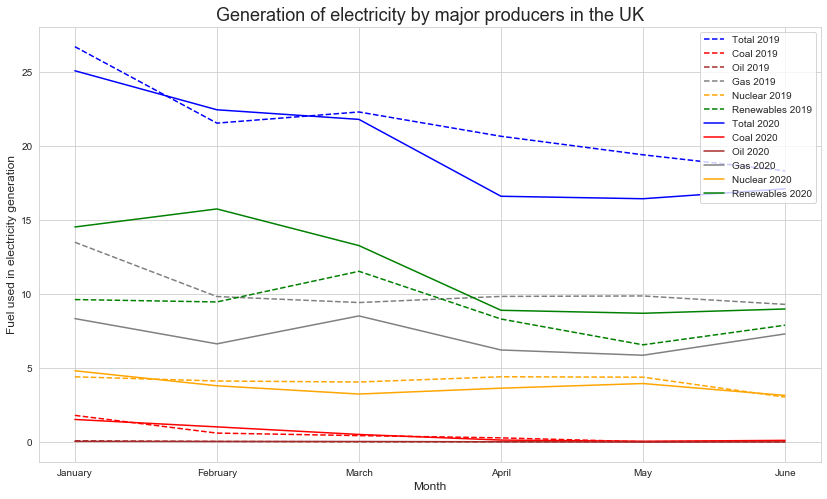

In [41]:
fueltype_data = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'fuel_type')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Total'][0:6], label='Total 2019',ls='--',color='blue')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Coal'][0:6], label='Coal 2019',ls='--',color='red')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Oil'][0:6], label='Oil 2019',ls='--',color='brown')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Gas'][0:6], label='Gas 2019',ls='--',color='grey')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Nuclear'][0:6], label='Nuclear 2019',ls='--',color='orange')
plt.plot(fueltype_data['Month'][0:6],fueltype_data['Renewables'][0:6], label='Renewables 2019',ls='--',color='green')

plt.plot(fueltype_data['Month'][12:18],fueltype_data['Total'][12:18], label='Total 2020',color='blue')
plt.plot(fueltype_data['Month'][12:18],fueltype_data['Coal'][12:18], label='Coal 2020',color='red')
plt.plot(fueltype_data['Month'][12:18],fueltype_data['Oil'][12:18], label='Oil 2020',color='brown')
plt.plot(fueltype_data['Month'][12:18],fueltype_data['Gas'][12:18], label='Gas 2020',color='grey')
plt.plot(fueltype_data['Month'][12:18],fueltype_data['Nuclear'][12:18], label='Nuclear 2020',color='orange')
plt.plot(fueltype_data['Month'][12:18],fueltype_data['Renewables'][12:18], label='Renewables 2020',color='green')


plt.xlabel('Month', fontsize = 12)
plt.ylabel('Fuel used in electricity generation', fontsize = 12)
plt.title('Generation of electricity by major producers in the UK', fontsize = 18)
plt.legend(loc="upper right")

While total energy supply decreased, the supply from renewables increased in the months after lockdown, (April to June) compared to other fuels, where all other fuels saw a decrease in their use. 

### The Stringency Index versus Energy Supply 

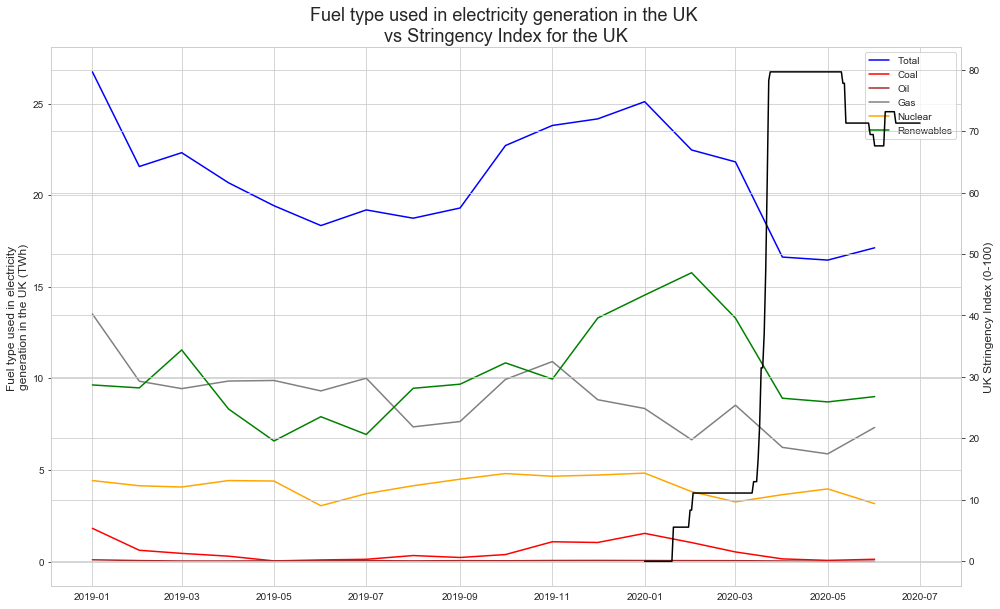

In [42]:
fig, ax1 = plt.subplots()

ax1.plot(fueltype_data['Date'],fueltype_data['Total'], label='Total',color='blue')
ax1.plot(fueltype_data['Date'],fueltype_data['Coal'], label='Coal',color='red')
ax1.plot(fueltype_data['Date'],fueltype_data['Oil'], label='Oil',color='brown')
ax1.plot(fueltype_data['Date'],fueltype_data['Gas'], label='Gas',color='grey')
ax1.plot(fueltype_data['Date'],fueltype_data['Nuclear'], label='Nuclear',color='orange')
ax1.plot(fueltype_data['Date'],fueltype_data['Renewables'], label='Renewables',color='green')

ax1.set_ylabel('Fuel type used in electricity \ngeneration in the UK (TWh)', fontsize = 12)
ax1.legend()

ax2 = ax1.twinx()

stringency_dataset = pd.read_excel('data/stringency_dataset.xlsx', sheet_name='index_stringency')
ax2.plot(stringency_dataset['Date'][0:183], stringency_dataset['Index'][0:183], label='Date', color='black')
ax2.set_ylabel('UK Stringency Index (0-100)', fontsize = 12)

fig.tight_layout()
plt.title('Fuel type used in electricity generation in the UK \nvs Stringency Index for the UK', fontsize = 18)
plt.show()

Here, we have looked at a longer trend of electricity generation in the UK, in terms of the fuels used and the effect of lockdown on the mix of fuels compared to previous trends. There was a fall in total electricity demand which coincides with a fall in electricity demand as the weather becomes warmer, although there appears to be a greater fall in demand compared to the previous year, 2019. In order to try to determine the effect of the lockdown more closely on the mix of fuels, we have looked at the changes in fuel types between 2018 - 2019 and 2019 - 2020 (below).

### Change in Fuel Mix 2019 - 2020 

#### Plot Change in Fuel Mix (2019 - 2020)

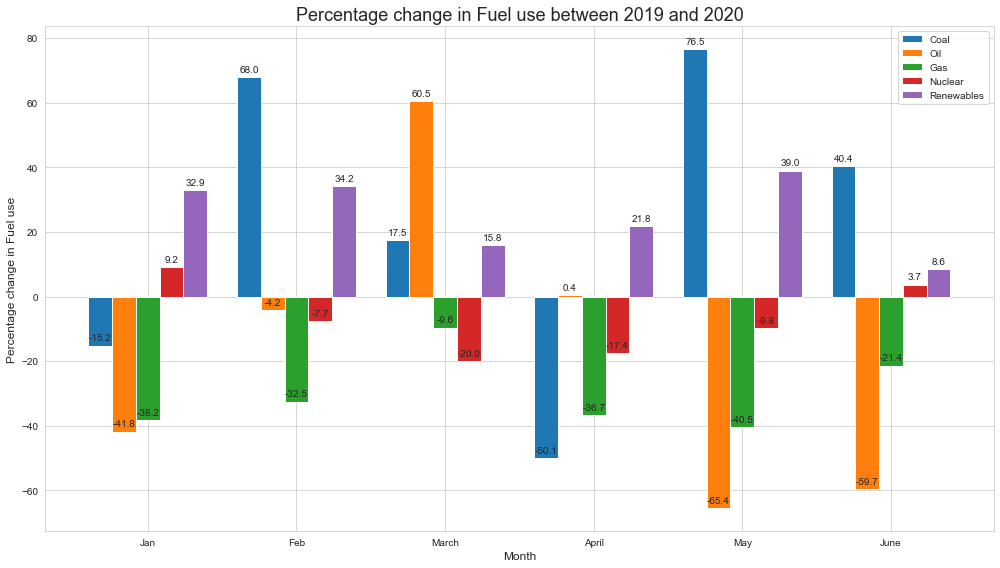

<Figure size 1296x864 with 0 Axes>

In [39]:
percentage_change = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'percentage_change')

labels = ['Jan','Feb','March','April','May','June']
fig, ax = plt.subplots()

Coal = []
Oil = []
Gas = []
Nuclear = []
Renewables = []

Coal = percentage_change['Coal'].tolist() 
Oil = percentage_change['Oil'].tolist() 
Gas = percentage_change['Gas'].tolist() 
Nuclear = percentage_change['Nuclear'].tolist() 
Renewables = percentage_change['Renewables'].tolist() 

plt.figure(figsize=(18,12))
x = np.arange(len(labels))
width = 0.16
rects1 = ax.bar(x-width*2, Coal, width, label='Coal')
rects2 = ax.bar(x-width, Oil, width, label='Oil')
rects3 = ax.bar(x, Gas, width, label='Gas')
rects4 = ax.bar(x+width, Nuclear, width, label='Nuclear')
rects5 = ax.bar(x+width*2, Renewables, width, label='Renewables')

ax.set_ylabel('Percentage change in Fuel use', fontsize = 12)
ax.set_title('Percentage change in Fuel use between 2019 and 2020', fontsize = 18)
ax.set_xlabel('Month', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.show()

Note: The percentage increase of coal is large between 2019 and 2020, however relatively it remains a small part of the energy mix, ex. in February 2020 it was 5% of the energy mix compared to 6% in February 2019.

#### Plot Change in Fuel Mix (2018 - 2019)

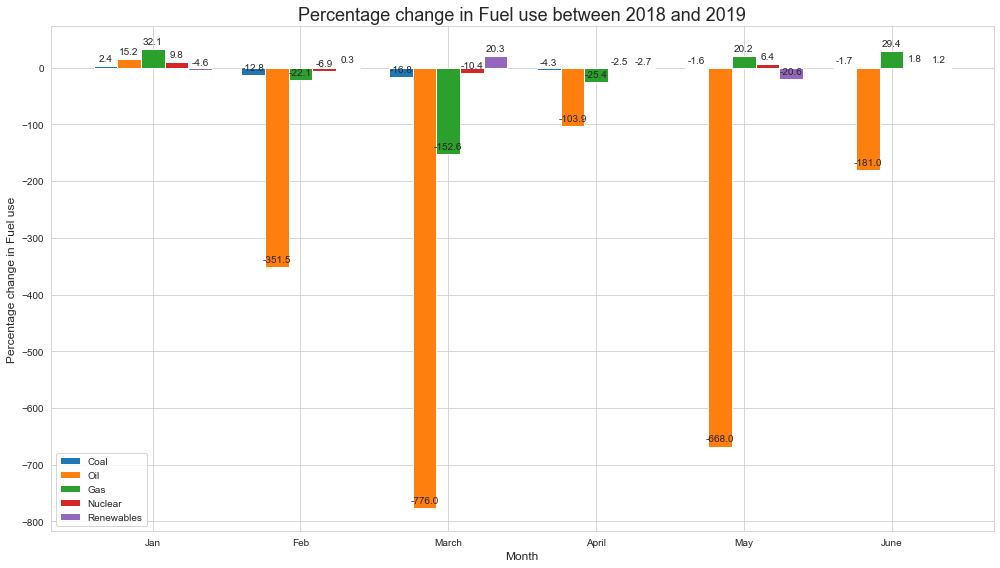

In [38]:
percentage_change2 = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'percentage_change2')

labels = ['Jan','Feb','March','April','May','June']
fig, ax = plt.subplots()

Coal = []
Oil = []
Gas = []
Nuclear = []
Renewables = []

Coal = percentage_change2['Coal'].tolist() 
Oil = percentage_change2['Oil'].tolist() 
Gas = percentage_change2['Gas'].tolist() 
Nuclear = percentage_change2['Nuclear'].tolist() 
Renewables = percentage_change2['Renewables'].tolist() 

x = np.arange(len(labels))
width = 0.16
rects1 = ax.bar(x-width*2, Coal, width, label='Coal')
rects2 = ax.bar(x-width, Oil, width, label='Oil')
rects3 = ax.bar(x, Gas, width, label='Gas')
rects4 = ax.bar(x+width, Nuclear, width, label='Nuclear')
rects5 = ax.bar(x+width*2, Renewables, width, label='Renewables')

ax.set_ylabel('Percentage change in Fuel use', fontsize = 12)
ax.set_title('Percentage change in Fuel use between 2018 and 2019', fontsize = 18)
ax.set_xlabel('Month', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.show()

This shows a greater increase in renewables then previously seen, even though was previously increasing too. Also, note the continuation of decrease in oil.

### Total Electricity Generation and associated CO2 Emissions 

The environmental impact of electricity generation is determined by the mix of fuels used. Using conversion factors from the UK Government the total kgCO2 was calculated for the first half of 2019 and 2020. 

#### Plot Electricity Generation and CO2 Emissions 

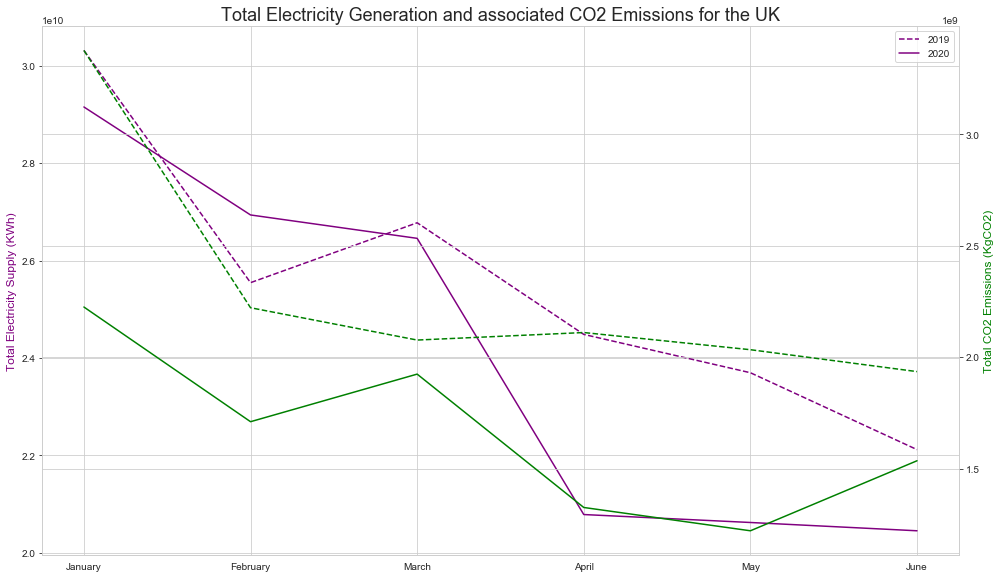

In [36]:
fig, ax1 = plt.subplots()
carbon = pd.read_excel('data/cfg_data.xlsx', sheet_name = 'carbon')

Legend = ['2019', '2020']

ax1.plot(carbon['Month'][0:6],carbon['total_energy'][0:6], label='2019',ls='--',color='purple')
ax1.plot(carbon['Month'][12:18],carbon['total_energy'][12:18], label='2020',color='purple')
ax1.legend(Legend)
ax1.set_ylabel('Total Electricity Supply (KWh)',color='purple', fontsize = 12)

ax2 = ax1.twinx()

ax2.plot(carbon['Month'][0:6],carbon['total_co2'][0:6], label='2019',ls='--', color='green')
ax2.plot(carbon['Month'][12:18],carbon['total_co2'][12:18], label='2020',color='green')
ax2.set_ylabel('Total CO2 Emissions (KgCO2)',color='green', fontsize = 12)

fig.tight_layout()
plt.title('Total Electricity Generation and associated CO2 Emissions for the UK', fontsize = 18)
plt.show()

The effect of lockdown, as we have seen previously has decreased total electricity generation. The fall in supply was greater compared to 2019 between February and April, and supply has remained lower for months following. In comparison, the Total CO2 Emissions from electricty supply also fell by a similar degree however appears to increase between May and June, compared to supply which appears to show a continued trend from the previous three months (April - June). For eighteen days in April the grid ran without any coal, for reasons including good weather as well as lower demand, which could be the reason for the uptick in Total CO2 emissions between May and June (2020). 

## How do we ensure that we come out of Lockdown in the most sustainable way when looking at Energy?

The effect of lockdown, we have seen is a fall in demand for energy nationally, as well as a different pattern of demand during the day. On supply, the mix of energy has changed, with renewables and coal showing an increase on the previous year, for the first six months of 2020.

The effect of lockdown on energy demand is that overall demand has fallen has fallen, due to businesses being closed or operating at limited capacity (where we have seen that industrial demand in particular has fallen). Domestic demand remains more constant, but the changes in timing of demand during the day, where the peaks are less than before lockdown which indicates a smoother daily demand 'curve'. This could help with managing renewable sources in the grid, where smaller peaks mean renewables are more able to manage demand and backups are required less when they are unable to meet demand. Working from home could be an explanation for the lower peaks, and encouraging this can help keep demand more 'constant'. However, as weather is one of the main factors in energy demand, it would be necessary to continue tracking energy demand during the Winter. One way the government is trying to reduce this demand is through their ['Green Homes Grant' scheme](https://www.iisd.org/sustainable-recovery/news/green-recovery-stimulus-for-uks-housing-sector/), in providing vouchers for the public to make their homes more energy efficient, where [homes in the UK are not energy efficient](https://www.bbc.co.uk/news/uk-50573338). The effectiveness of this scheme compared to people returning to offices will need to be established.

Emissions from energy have been falling throughout the previous 30 years, and this trend must continue if the UK is to meet it's Carbon targets and net-zero by 2050. What lockdown has shown is that with a lower energy demand (and good weather), the grid is able to manage a greater share of renewables in the electricity mix meaning lower associated emissions from supply. Continuing to increase the capacity of renewables in energy will lower the associated emissions from electricity generation. This will allow a greater ability to meet the targets, where the UK remains off-track to meet its' target this year, despite a record-breaking year, of eighteen consecutive days without coal. The government currently supports Offshore wind and provides funding for low-carbon technologies. Compared to other countries, the Green Recovery package has been small with [£350 million committed](https://www.gov.uk/government/news/pm-commits-350-million-to-fuel-green-recovery), compared to [€40 billion](https://www.businessgreen.com/news/4016109/green-recovery-germany-unveils-plans-eur40bn-climate-spending-surge) and [€30 billion](https://www.theguardian.com/world/2020/sep/03/france-launches-big-green-recovery-plan-part-100bn-stimulus-covid) (£37 billion and £27 billion) for Germany and France respectively. Ensuring a greater commitment of funding to these projects will spur a Green post-Covid recovery.

## Analysing Energy Performance of Office Buildings in UK

One of the aims of this work is to analyse the energy performance of Office Buildings across the UK. 
By analysing such data we aim to answer the question:

##### What is the energy performance of Office Buildings in the UK pre and post covid period?

##### What is the emission correlated to the energy generated?

##### What is the energy generation performance of office buildings per occupant?

- - - - - -

### Collection of Data;

#### 1. Office Buildings Utility Meters Dataset;

This has led to looking for some publicly available data on office buildings utility meters and our group has found the following [government data](http://www.ecodriver.uk.com/eCMS/viewfiles.asp?folder=HomeOffice);

The data chosen displays the relative energy performance of UK central government buildings for the selected period. The data driving this is taken from building utility meters, half-hourly. The chosen office building chosen is located in London and is the Home Office Headquarters.

#### 2. Office Building 2MS specifications;

The building chosen from the dataset for this analysis has been the **Home Office Headquarters also called 2MS**, which stands for 2 Marshall Street. 

The [following link](https://www.facilitatemagazine.com/features/interviews/2010/10/12/home-office) shares some insight as to the layout, design, capacity and space allocation of 2MS.
The most important pieces of information include;

 -  Net internal floor area: 54,000 sq metres
 -  Capacity 4,500 employees.
 -  "... [2MS] is also using more energy to heat, cool, and light it, which affects the individual building's performance."

This will be necessary later when examining performance per person.

#### 3. GHG Emissions Units;

kgCO2e per unit of electricity (kWh): 0.537

In [14]:
import matplotlib.dates as md
import datetime

March_Data = pd.read_excel('data/HomeOfficeGeneration.xlsx', sheet_name = 'March')
April_Data = pd.read_excel('data/HomeOfficeGeneration.xlsx', sheet_name = 'April')
May_Data = pd.read_excel('data/HomeOfficeGeneration.xlsx', sheet_name = 'May')

------
##### What is the energy performance of Office Buildings in the UK pre and post covid period?

To answer this question there's a particular focus on the Home Office Headquarters' Energy Generation with **comparison across 2019-2020 Data**;

The timeframe considered is easibly changeable from a day to a week to a whole month thanks to the functions created;

 - plot_energy_generation_of_any_chosen_date_march allows for a simple plot of energy emissions against time.
 - comparison_plot_with_emissions_of_any_chosen_date_march includes emissions calculation on the second y axis

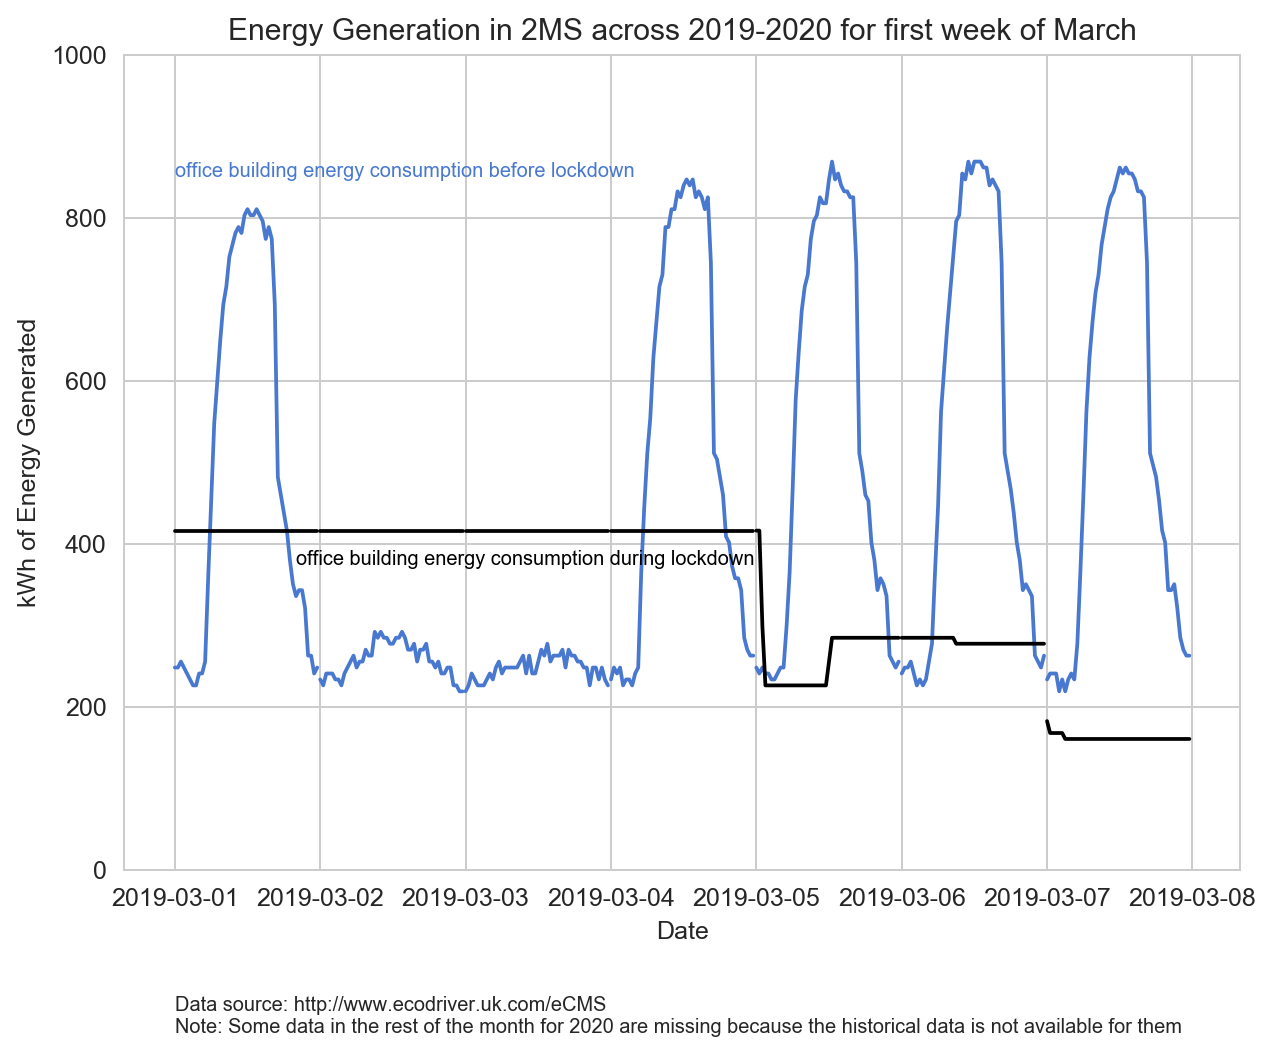

In [17]:
Time = March_Data[1:2].to_numpy()[0][5:]
labels = March_Data[1:2].values.tolist()

# Clean up March 2019 Data

March_19_Data = March_Data[20:]
March_19_Data.columns = labels
HQ_Electr_March_2019 = March_19_Data[31:].to_numpy()

# Clean up March 2020 Data

March_20_Data = March_Data[:20]
March_20_Data.columns = labels
HQ_Electr_March_2020 = March_20_Data[2:10].to_numpy()

Date = HQ_Electr_March_2019[:,4]

def plot_energy_generation_of_any_chosen_date_march(day_chosen, year_chosen):
    """
    :param day_chosen: this is an integer n = 1, 2 ... 31 to stand for the day of the month.
    :param year_chosen: this is an integer 2019 or 2020 to give the choice to call upon any one of those datasets.
    :return: plot
    """
    
    blue, = sns.color_palette("muted", 1)

    # Necessary Handling of datetime.datetime format
    x = March_Data[1:2].values[0][5:].tolist()
    x_dt = [datetime.datetime.combine(Date[day_chosen], t) for t in x]
    x = md.DateFormatter('%Y-%m-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(x)
    
    # Plot of data and if statements to handle different cases.
    if year_chosen == 2019:
        plt.plot(x_dt, HQ_Electr_March_2019[day_chosen,5:], color = blue)
    elif year_chosen == 2020:
        plt.plot(x_dt, HQ_Electr_March_2020[day_chosen,5:], color = 'black')
    else:
        print("Oops - year not valid: it's either 2019 or 2020")

    return

Fig1 = plt.figure(figsize=(8, 6), dpi=180,)
for i in range(7):
    plot_energy_generation_of_any_chosen_date_march(i, 2019)
for i in range(7):
    plot_energy_generation_of_any_chosen_date_march(i, 2020)
plt.title("Energy Generation in 2MS across 2019-2020 for first week of March")

blue, = sns.color_palette("muted", 1)
x = March_Data[1:2].values[0][5:].tolist()
x_dt = [datetime.datetime.combine(Date[0], t) for t in x]
plt.text(x_dt[0], 850, "office building energy consumption before lockdown", fontsize = 8, color = blue)
plt.text(x_dt[40], 375, "office building energy consumption during lockdown", fontsize = 8, color = 'black')

plt.text(x_dt[0], -200, "Data source: http://www.ecodriver.uk.com/eCMS"      
       "\nNote: Some data in the rest of the month for 2020 are missing because the historical data "    
       "is not available for them", fontsize=8)

plt.ylabel("kWh of Energy Generated")
plt.xlabel("Date")

plt.ylim(0,1000)
plt.show()

The above sample week in March shows how government employees had been set out to work from home prior to the actual lockdown - and that **even an empty office has a half-hourly energy consumption of about 200 kWh** (meaning it is 400 kWh per hour).

A potential question for future analysis is, why does the maintenance of an empty office consume so much energy and could that be avoided? A thought we had on the matter is that it could serve for the upkeeping of servers to store sensitive data, but this has not been confirmd. For the sake of the current work this specific question will not be analysed.

-----
##### What is the emission correlated to the energy generated?

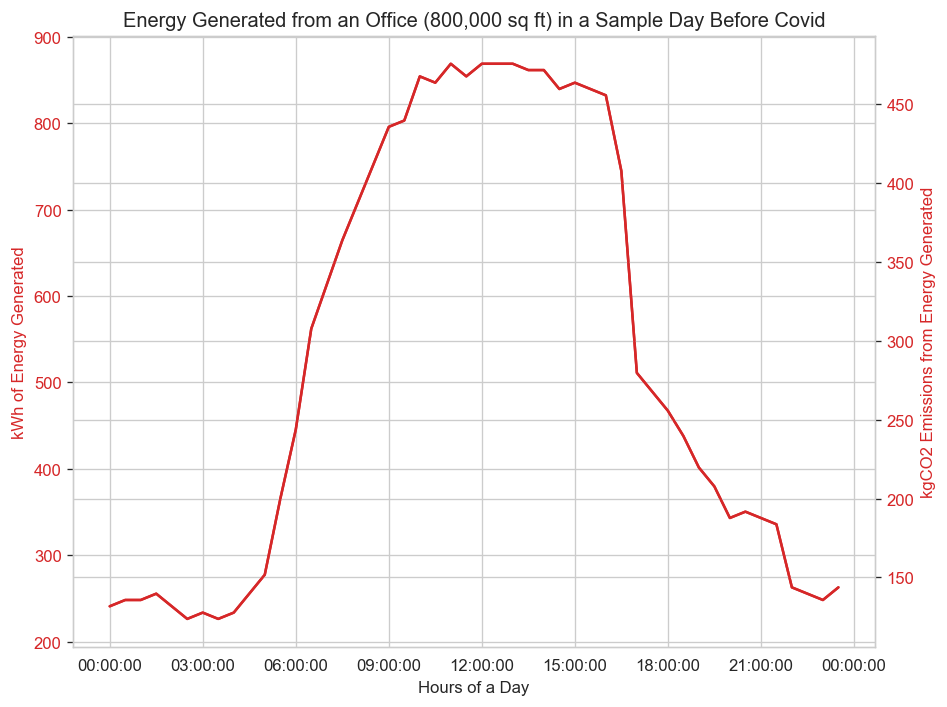

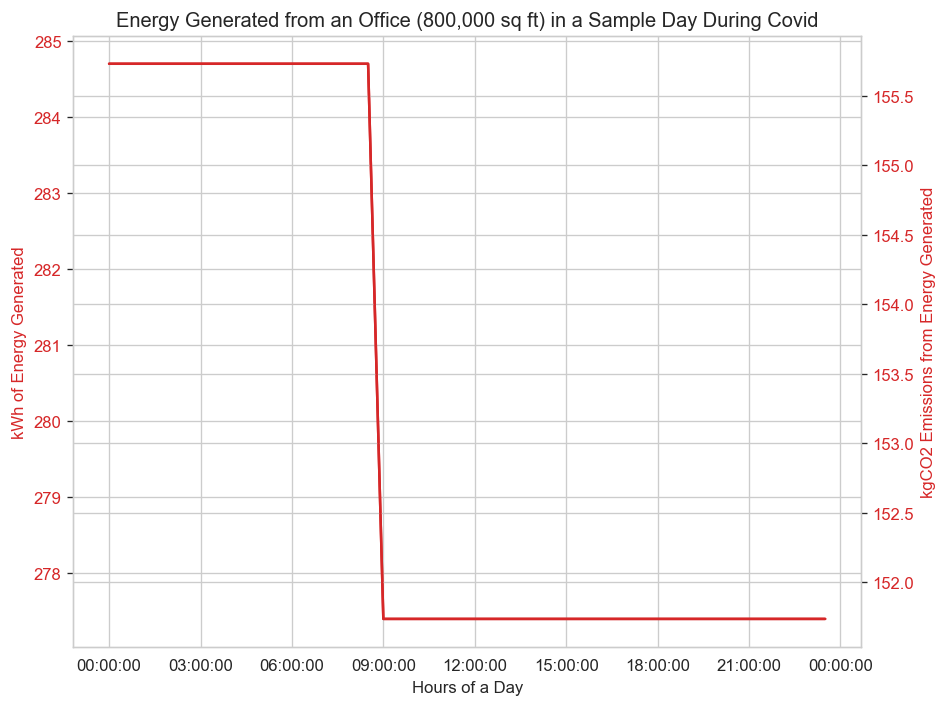

In [28]:
def comparison_plot_with_emissions_of_any_chosen_date_march(day_chosen, year_chosen):
    """
    :param day_chosen: this is an integer n = 1, 2 ... 31 to stand for the day of the month.
    :param year_chosen: this is an integer 2019 or 2020 to give the choice to call upon any one of those datasets.
    :return: plot
    """
    
    # Necessary manipulation for datetime.datetime format
    x = March_Data[1:2].values[0][5:].tolist()
    x_dt = [datetime.datetime.combine(Date[day_chosen], t) for t in x]

    # Plot
    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=120,)
    if year_chosen == 2020: 
        ax1.set(title = "Energy Generated from an Office (800,000 sq ft) in a Sample Day During Covid")
    elif year_chosen == 2019:
        ax1.set(title = "Energy Generated from an Office (800,000 sq ft) in a Sample Day Before Covid")
 
    color1 = 'tab:red'
    ax1.set_xlabel('Hours of a Day')
    ax1.set_ylabel('kWh of Energy Generated', color=color1)
    if year_chosen == 2020:
        ax1.plot(x_dt, HQ_Electr_March_2020[day_chosen,5:], color=color1)
    elif year_chosen == 2019:
        ax1.plot(x_dt, HQ_Electr_March_2019[day_chosen,5:], color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color2 = 'tab:blue'
    ax2.set_ylabel('kgCO2 Emissions from Energy Generated', color = color1)  # we already handled the x-label with ax1
    if year_chosen == 2020:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2020[day_chosen,5:], color= color1)
    elif year_chosen == 2019:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2019[day_chosen,5:], color= color1)
    # ax2.fill_between(x = x_dt, y1 = 0.547*HQ_Electr_March_2019[0,5:], color = color, alpha = 0.30)
    ax2.tick_params(axis='y', labelcolor = color1)

    x = md.DateFormatter('%H:%M:%S')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(x)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

    return

# Before Covid - 2019 Data

comparison_plot_with_emissions_of_any_chosen_date_march(5, 2019)

# After Covid - 2020 Data

comparison_plot_with_emissions_of_any_chosen_date_march(5, 2020)

- - - - - - 
##### What is the energy generation performance of office buildings per occupant?

The site contains **54,000 sq ft of office space.** According to one of the sources stated above this implies that the capacity of the office is of about 4,500 workers.

The following analysis is done to look at the office emissions as a "per-person" figure. This way performance can be analysed and compared later to the home office category.

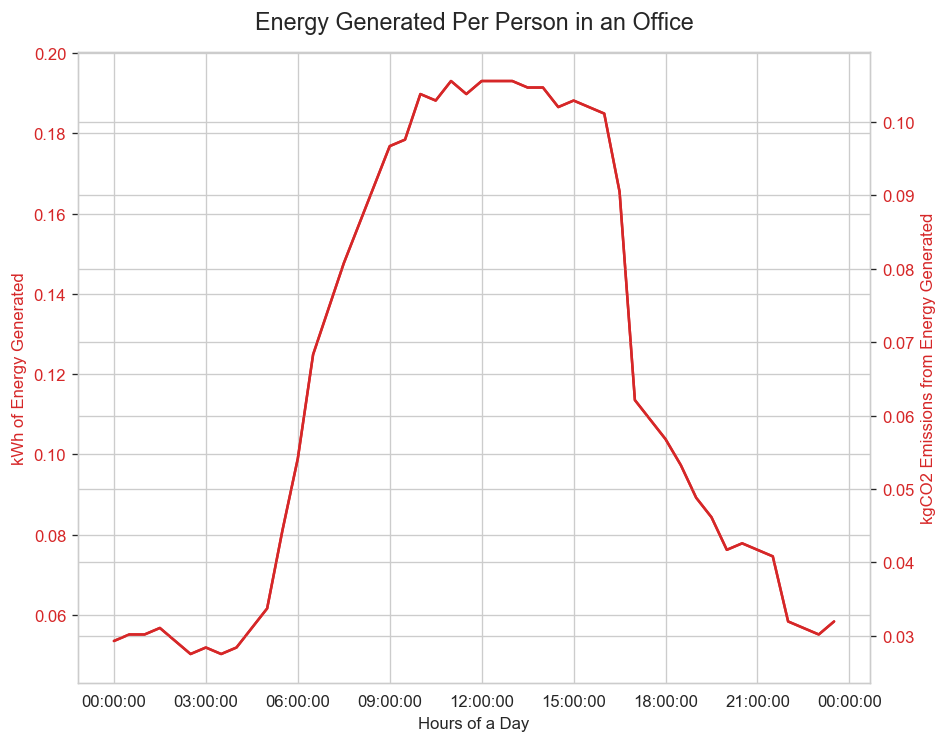

In [27]:
# Total occupancy
capacity = 4500

def office_emissions_per_person_march(day_chosen, year_chosen, capacity):
    """
    :param day_chosen: this is an integer n = 1, 2 ... 31 to stand for the day of the month.
    :param year_chosen: this is an integer 2019 or 2020 to give the choice to call upon any one of those datasets.
    :return: plot
    """
    
    # Necessary manipulation for datetime.datetime format
    x = March_Data[1:2].values[0][5:].tolist()
    x_dt = [datetime.datetime.combine(Date[day_chosen], t) for t in x]
    
    # Plot
    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=120,)
    
    fig.suptitle("Energy Generated Per Person in an Office", fontsize = (14), x = 0.5, y = 1.025)
    
    color1 = 'tab:red'
    ax1.set_xlabel('Hours of a Day')
    ax1.set_ylabel('kWh of Energy Generated', color=color1)
    if year_chosen == 2020:
        ax1.plot(x_dt, HQ_Electr_March_2020[day_chosen,5:], color=color1)
    elif year_chosen == 2019:
        ax1.plot(x_dt, HQ_Electr_March_2019[day_chosen,5:]/capacity, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()

    color2 = 'tab:blue'
    ax2.set_ylabel('kgCO2 Emissions from Energy Generated', color = color1)
    if year_chosen == 2020:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2020[day_chosen,5:], color = color1)
    elif year_chosen == 2019:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2019[day_chosen,5:]/capacity, color = color1)
    ax2.tick_params(axis='y', labelcolor = color1)

    x = md.DateFormatter('%H:%M:%S')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(x)

    fig.tight_layout()
    
    return

office_emissions_per_person_march(5, 2019, capacity)

The shape of this daily time series is understandably the same as the previous plot, however what is important is the relative size as can be seen by the axis change. This will allow for analysis and comparison with the following section.

## Analysing Energy Performance of Home Offices in UK

The data has been collected and manipulated to represent the average electric appliances and electric heating consumption over a sample week.

Assumptions and data collection can be found below.

The following analysis has been chosen to allow for a comparison from Home Office Consumption to the Office Buildings in the UK, and the subsequent effect on the environment and GHG emissions.

### Collection of Data;

#### 1. Typical/Average Consumption of Energy in hours:

https://www.ukpower.co.uk/home_energy/average-household-gas-and-electricity-usage

Using data for an Electricity Profile Class 1 of an average household.

                          Pre-Covid for the average Office Worker

| consumption_rate_low  | consumption_rate_medium  | consumption_rate_high  |  measure  |
|-----------------------|--------------------------|------------------------|-----------|
|          1,800        |           2,900          |          4,300         |kWh per day|

What is energy usage during covid?

                          During-Covid for the average Working-from-Home Employee

| consumption_rate_low  | consumption_rate_medium  | consumption_rate_high  |  measure  |
|-----------------------|--------------------------|------------------------|-----------|
|          ?            |          ?               |          ?             |kWh per day|

#### 2. Energy Consumption by appliance - Dataset Household Appliances Average Power Ratings;

- https://www.cse.org.uk/advice/advice-and-support/how-much-electricity-am-i-using

Analysing what work-related appliances will are used more in a scenario of home-working.
For calculation purposes a few **assumptions are made**:
 - A workday is 9 hour long, a 5 working week and there are 48 working weeks per year.
 - It is necessary to have a desktop, and other small power equipment;
   For the purpose of this analysis the following equipments are included
   Smart phone charge, Tablet charge, Broadband router, Laptop, Desktop Computer,   Microwave, Toaster and Kettle. A few of this equipments are assumed to be used for the full duration of the workday (9 hours) whilst others are considered to be only used for a smaller durationn (15 minutes to 30 minutes).
 - To not underestimate electricity consumption a decision has been made to utilise primarily the upper bound values of the kWh.

#### 3. Energy Consumption by Electric Heater - 
Now include heating up the home with electrical heating

- https://www.greenmatch.co.uk/green-energy/central-heating-capacity
- https://www.vivintsolar.com/blog/how-much-electricity-does-a-space-heater-use
- https://consumption.selectra.co.uk/results

Electric Radiator Output Upper Bound = **1,500 W**

For calculation purposes a few **assumptions are made**:
 - A workday is 9 hour long, a 5 working week and there are 48 working weeks per year.
   To not risk underestimating the electricity consumption of the heating system, the calculation is made assuming that the heating is on consistently (throughout the workday) at an ECO setting of about 18 degrees.
 - Heating of one room only - a 'home office' room.

[Text(0, 0.5, 'Energy in kWh'),
 Text(0.5, 1.0, 'Heating Consumption in kWh over a working week')]

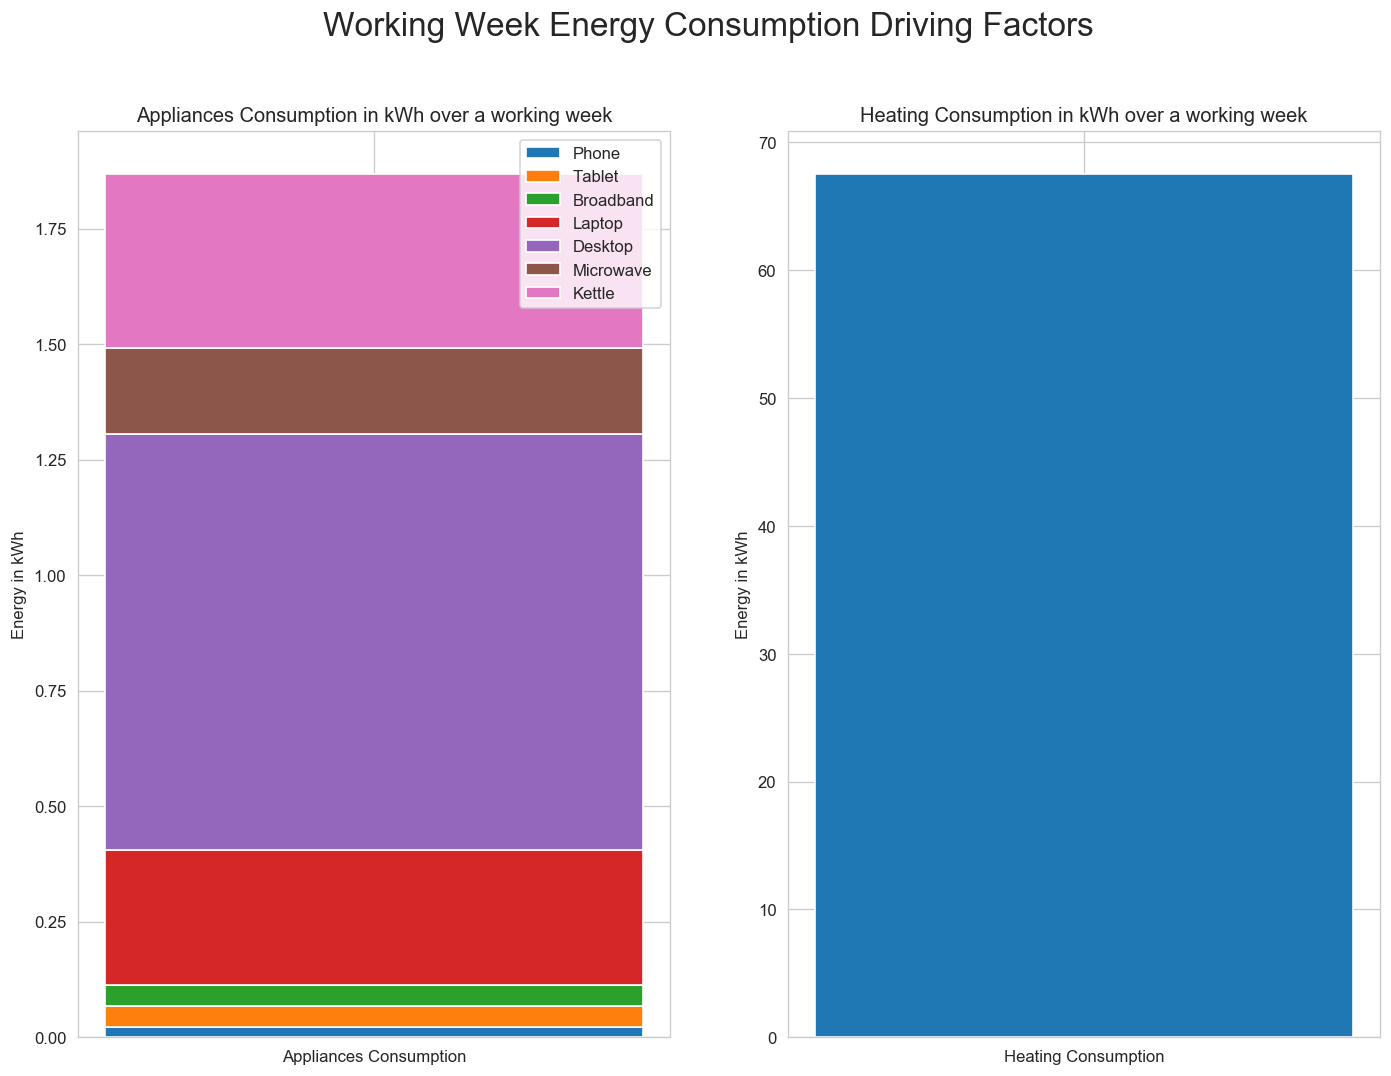

In [21]:
# 1. Reading Data on Appliances Consumption in kWh;

appliances_consumption = pd.read_excel('data/Household Appliances Average Power Ratings.xlsx')

# Extract Appliances of interest and include:
# conversion to kWh
# weekly conversion [9 h per day * 5-day working week]

phone_charge_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Smart phone (charge)']['Average power rating (Watts)'].values[0]*0.0001*9*5
tablet_charge_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Tablet (charge)']['Average power rating (Watts)'].values[0]*0.0001*9*5
broadband_router_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Broadband router']['Average power rating (Watts)'].values[0]*0.0001*9*5
laptop_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Laptop']['Average power rating (Watts)'].values[0]*0.0001*9*5
desktop_computer_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Desktop computer']['Average power rating (Watts)'].values[0]*0.0001*9*5
microwave_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Microwave']['Average power rating (Watts)'].values[0]*0.0001*0.25*5
kettle_weekly_avg_power_rating_kWh = appliances_consumption[appliances_consumption['Appliance '] == 'Kettle']['Average power rating (Watts)'].values[0]*0.0001*0.25*5

# 2. Include Heating Consumption in kWh;

heating_weekly_avg_power_rating_kWh = 1.5*9*5

# 3. Combining Data;

weekly_avg_power_rating_increase = np.array((phone_charge_weekly_avg_power_rating_kWh, tablet_charge_weekly_avg_power_rating_kWh,
                                    broadband_router_weekly_avg_power_rating_kWh, laptop_weekly_avg_power_rating_kWh,
                                    desktop_computer_weekly_avg_power_rating_kWh, microwave_weekly_avg_power_rating_kWh,
                                    kettle_weekly_avg_power_rating_kWh, heating_weekly_avg_power_rating_kWh))
# 4. Stacked Bar Plot;

fig, ax = plt.subplots(ncols = 2, figsize = (14, 10), dpi = 120)
fig.suptitle("Working Week Energy Consumption Driving Factors", fontsize = 20)
#ax.axis.label.set_size(20)
Label = ['Phone', 'Tablet', 'Broadband', 'Laptop', 'Desktop', 'Microwave', 'Kettle', 'Heating']
ax[0].bar(x = "Appliances Consumption", height = weekly_avg_power_rating_increase[0], width = 0.5)
bottom_bar = weekly_avg_power_rating_increase[0]
for i in range(1, 7):
    ax[0].bar(x = "Appliances Consumption", height = weekly_avg_power_rating_increase[i], bottom = bottom_bar, width = 0.5)
    bottom_bar = bottom_bar + weekly_avg_power_rating_increase[i]
    ax[0].legend(labels = (Label[0], Label[1], Label[2], Label[3], Label[4], Label[5], Label[6]), fancybox = True)

ax[1].bar(x = "Heating Consumption", height = weekly_avg_power_rating_increase[7])

ax[0].set(title = "Appliances Consumption in kWh over a working week", ylabel = "Energy in kWh")
ax[1].set(title = "Heating Consumption in kWh over a working week", ylabel = "Energy in kWh")

#ax[2].set(title = "Total Consumption in kWh over a working week", ylabel = "Energy in kWh")
#ax[2].bar(x = "Appliances Consumption", height = weekly_avg_power_rating_increase[0], width = 0.75)
#bottom_bar = weekly_avg_power_rating_increase[0]
#for i in range(1, 8):
#    ax[2].bar(x = "Appliances Consumption", height = weekly_avg_power_rating_increase[i], bottom = bottom_bar, width = 0.75)
#    bottom_bar = bottom_bar + weekly_avg_power_rating_increase[i]
#    ax[2].legend(labels = (Label[0], Label[1], Label[2], Label[3], Label[4], Label[5], Label[6], Label[7]), fancybox = True)

In [22]:
# Updating the consumption rates for a home-working individuals

daily_avg_power_rating_increase = weekly_avg_power_rating_increase[0:7]/5
extra_daily_energy_consumption = 0
for factor in daily_avg_power_rating_increase:
    extra_daily_energy_consumption = extra_daily_energy_consumption + factor
    
print("The extra energy consumption per day due to home working (excluding electric heating) is equivalent to", extra_daily_energy_consumption)

The extra energy consumption per day due to home working (excluding electric heating) is equivalent to 0.3735


Hence by considering again the table mentioned at the beginning of the section;

                          Pre-Covid for the average Office Goer

| consumption_rate_low  | consumption_rate_medium  | consumption_rate_high  |  measure  |
|-----------------------|--------------------------|------------------------|-----------|
|          1,800        |           2,900          |          4,300         |kWh per day|

Now using the newfound energy consumption values (including electric heating), we could infer that the **consumption rate for During-Covid for the average Working-from-Home Employee increase on average by about ~13.84 kWh**.

Which seems to be a somewhat small value in comparison with overall daily consumption rates. An interesting point is that in comparison to larger appliances such as Washing Machines, Fridges, Tumble Dryers etc - the home office equipment results in a much smaller energy expenditure.

The limitations of this analysis are mostly to do with the numerous assumption that had to be taken. Moreover there has been no seasonality adjustment. This is because the assumption of keeping the heating on for the full 9 hours has been made to replicate the scenario of the month of March.

## Comparison of Energy Performance of Home Offices in UK vs Office Buildings in the UK

The previous analysis has been carried out primarily to allow for a comparison from Home Office Consumption to the Office Buildings in the UK, and the subsequent effect on the environment and GHG emissions.

Data Manipulation in plots to be aware of;

 - extra_daily_energy_consumption_data is being divided by two to account for the half-hourly plotting.
 - HQ_Electr_March_2019 is being used to have a realistic comparison with a 'normal' office day.
 - HQ_Electr_March_2019 is already half-hourly data hence no adjustment is needed.
 - extra_daily_energy_consumption_data currently excludes heater consumption because couldn't factcheck that the 2MS data included heating or not.

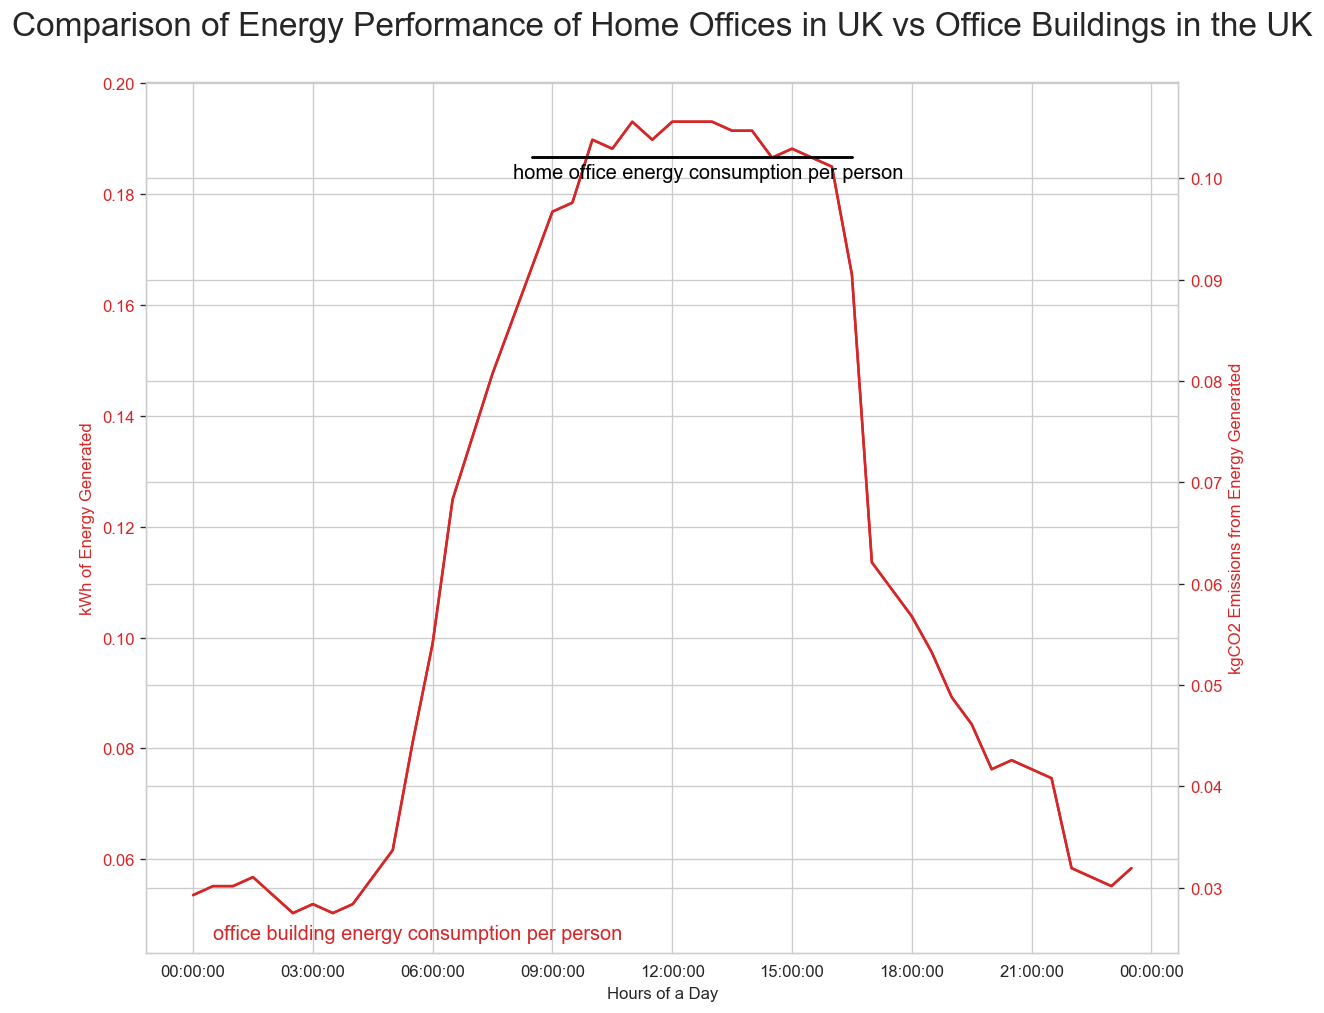

In [23]:
# Necessary manipulation for datetime.datetime format
x = March_Data[1:2].values[0][5:].tolist()
x_dt = [datetime.datetime.combine(Date[5], t) for t in x]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8), dpi=120,)
fig.suptitle(t = "Comparison of Energy Performance of Home Offices in UK vs Office Buildings in the UK", fontsize = 20, x = 0.5, y = 1.05)

color1 = 'tab:red'
ax1.set_xlabel('Hours of a Day')
ax1.set_ylabel('kWh of Energy Generated', color=color1)
ax1.plot(x_dt, HQ_Electr_March_2019[5,5:]/4500, color=color1)
ax1.plot(x_dt[17:34], np.repeat(extra_daily_energy_consumption/2, len(x_dt[17:34])), color='black')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('kgCO2 Emissions from Energy Generated', color = color1)  # we already handled the x-label with ax1
ax2.plot(x_dt, HQ_Electr_March_2019[5,5:]*0.547/4500, color=color1)
ax2.plot(x_dt[17:34], np.repeat(extra_daily_energy_consumption*0.547/2, len(x_dt[17:34])), color='black')
ax2.tick_params(axis='y', labelcolor=color1)

plt.text(x_dt[16], 0.1, "home office energy consumption per person", fontsize = 12, color = 'black')
plt.text(x_dt[1], 0.025, "office building energy consumption per person", fontsize = 12, color = color1)

x = md.DateFormatter('%H:%M:%S')
ax = plt.gca()
ax.xaxis.set_major_formatter(x)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

One could be cautiously optimistic when seeing the home office energy consumption per person being lower than the office building energy consumption per person, as a positive indication of **home office scenario being better in terms of kgCO2 emissions for the environment**.

However, even though it looks as if Home Office Energy Consumption falls below the Office Buildings Energy Consumption, it still is not a perfect representation of the home office category. There are definitely **limitations** in this analysis due to the assumptions that were made, but some insightful points could still be taken from it.

The largest component that could lead to the 'Home Working' to be a much preferred choice is when **considering the component of CO2 emission when travelling to work**.

# Not travelling to work or anywhere else: How did the way we normally move around change?

## Transport Analysis
Travelling to work can create a condiserable amount of energy we consume and the emmissions that we create, as the country was locked down and much of the population were at home only travelling for necessities. This new need to work from home and stay in place causes the use of different transport methods to change when measures to protect from COVID-19 were put in place. Let us explore this and other impacts this may have caused. 

In a 2017 [Department for Transport](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/661933/tsgb-2017-report-summaries.pdf) report it is highlighted that cars/vans are the usual travel mode to work and the longest time spent commuting is in London. Further as cars are the largest transport polluters even above domestic aviation, the understanding how the use of transport modes changed during lockdown and beyond helps look at the areas we need to work on to reduce our greenhouse gas emmissions and fufill our [Clean Air Sustainability Target](https://www.gov.uk/government/publications/25-year-environment-plan/25-year-environment-plan-our-targets-at-a-glance).

## How did the Use of Transport Modes Change?

Using data collected by [The Department for Transport](https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic) we can look at how the usage of Cars, Rail and Buses compare to an equivalent week or day:
- **Cars**: Percentage of the equivalent day in the first week of February 2020.
- **National Rail**: Percentage of the equivalent week in 2019.
- **Transport for London Tube**: Percentage of the equivalent day in 2019.
- **Transport for London Bus**: Percentage of the equivalent day in 2019.
- **Bus (excl. London)**: Percentage of the equivalent day of the third week of January 2020.
- **Cycling**: Percentage of the equivalent day in the first week of March.

### Import transport data

In [13]:
transport_data = pd.read_excel('data/transport_compared_february.xlsx', sheet_name='Percentage W')

In [14]:
x = transport_data['Date']

y_cars = transport_data['Cars W']
y_national_rail = transport_data['National Rail W']
y_tube = transport_data['Transport for London Tube W']
y_lbus = transport_data['Transport for London Bus W']
y_bus = transport_data['Bus (excl. London) W']
y_cycle = transport_data['Cycling W']

### Plot Transport Data

Text(2020-03-09 00:00:00, -15, 'Data source: Department for Transport\nNote: Data on TfL Buses is not available from Sunday 19th April to 8th June due to the change in boarding policy')

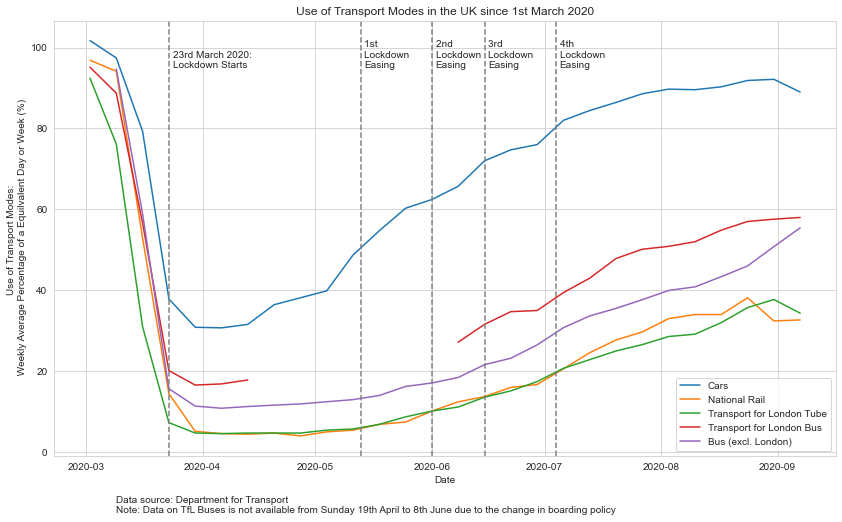

In [15]:
plt.plot(x, y_cars, label='Cars')
plt.plot(x, y_national_rail, label='National Rail')
plt.plot(x, y_tube, label='Transport for London Tube')
plt.plot(x, y_lbus, label='Transport for London Bus')
plt.plot(x, y_bus, label='Bus (excl. London)')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 95, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 95, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 95, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 95, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 95, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Use of Transport Modes: \n Weekly Average Percentage of a Equilvalent Day or Week (%)')
plt.title("Use of Transport Modes in the UK since 1st March 2020")
plt.legend()

plt.text(x[1], -15, "Data source: Department for Transport"
                         "\nNote: Data on TfL Buses is not available from Sunday 19th April to 8th June due to the change in boarding policy", fontsize=10)

### Cycling

Text(2020-03-09 00:00:00, 65, 'Data source: Department for Transport')

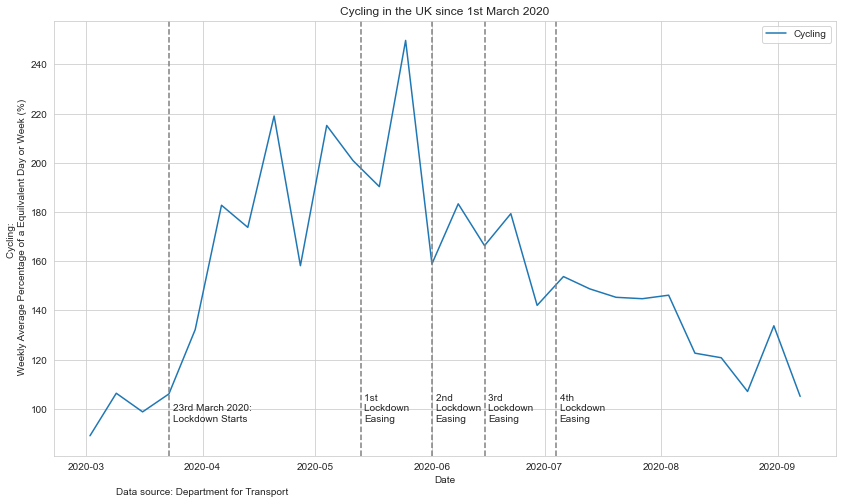

In [16]:
plt.plot(x, y_cycle, label='Cycling')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 95, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 95, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 95, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 95, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 95, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Cycling: \n Weekly Average Percentage of a Equilvalent Day or Week (%)')
plt.title("Cycling in the UK since 1st March 2020")
plt.legend()

plt.text(x[1], 65, "Data source: Department for Transport", fontsize=10)

## Use of Transport Modes vs Stringency Index

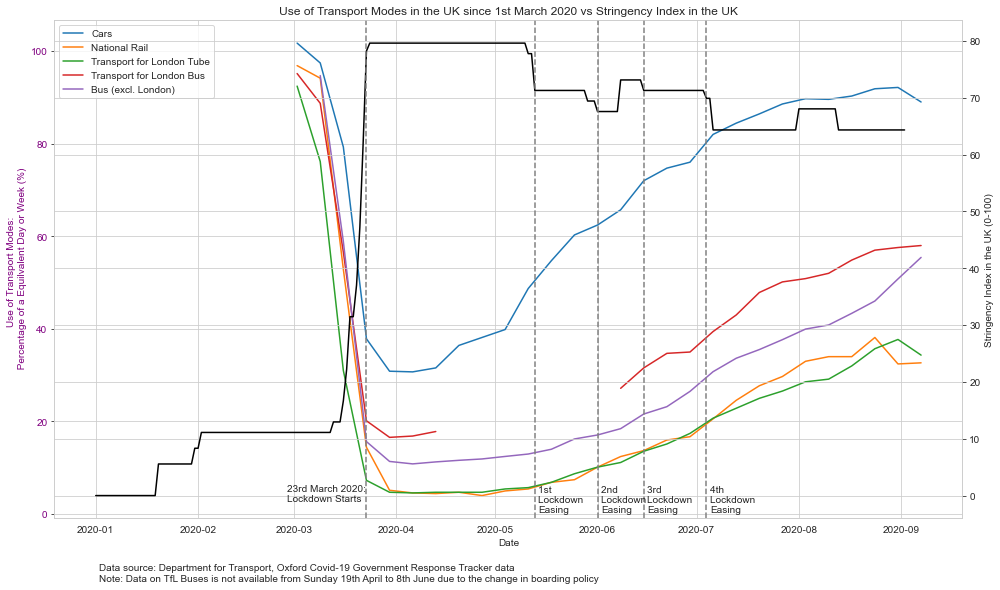

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(x, y_cars, label='Cars')
ax1.plot(x, y_national_rail, label='National Rail')
ax1.plot(x, y_tube, label='Transport for London Tube')
ax1.plot(x, y_lbus, label='Transport for London Bus')
ax1.plot(x, y_bus, label='Bus (excl. London)')

ax1.set_xlabel('Date')
ax1.set_ylabel('Use of Transport Modes: \n Percentage of a Equilvalent Day or Week (%)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend()

ax2 = ax1.twinx()

ax2.plot(stringency_data['Date'], stringency_data['Stringency'], color='black')
ax2.set_ylabel('Stringency Index in the UK (0-100)')

ax2.text(np.datetime64('2020-01-02'), -15, "Data source: Department for Transport, Oxford Covid-19 Government Response Tracker data"
                         "\nNote: Data on TfL Buses is not available from Sunday 19th April to 8th June due to the change in boarding policy", fontsize=10)

fig.tight_layout()
plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-02-28'), -1, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), -3, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), -3, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), -3, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), -3, '4th \nLockdown \nEasing')
plt.title("Use of Transport Modes in the UK since 1st March 2020 vs Stringency Index in the UK")

plt.show()



## What do these Figures show us?

As shown by the two figure above, when lockdown started in the UK there was a sharp decline in the usage of all modes of transport compared to what we would expect to see normally. As lockdown restrictions eased cars climbed back up to a near normal level but still a small decrease overall nevertheless. However, even though public transport usage grew as well this was not at the level of cars as well and is not near its normal levels.

Although, in comparision cycling levels increased 2-fold as lockdown started. This did not last though as cycling dropped back down to normal levels as lockdown restrictions have been lifted, and may also be partially due to exercise during lockdown.

From this we can see that even though many office workers were remaining at home to work but other workers were gradually going back to work and people were making more journeys in cars for other reasons. This decline in car usage is seemingly superfical.

Overall, even though there has been a reduction of all vehicles on the road the best sustained reduction would've been best to seen in cars the largest contributor to greenhouse emmissions, yet positively the levels of car usage is still lower then previously which is moving in a good direction.

## Focus: London Traffic Levels by each Transport mode 

Using an Office for National Statistics [Experimental dataset for busyness indices](https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity), focusing on the busy city of London, it is interesting to understand how traffic has actually changed on the roads. Even though this is limited to one city it is a good insight into the traffic in a city during COVID-19 and as Londoners as previously mentioned spent the longest time commuting this would be valuable insight to see what the effects of people working from home. 

This data counts the amount of each mode so would be interesting to see the percentage change from the first day recorded **11th March 2020** to the **day after** (To see the full extent of the effect):
- Lockdown Starts
- 1st London Easing
- 2nd London Easing
- 3rd London Easing
- 4th London Easing

In [18]:
### Import London Transport mode data

In [19]:
london_transport_data = pd.read_excel('data/traffic_camera_london.xlsx')

In [20]:
def car_level(index):
    return london_transport_data['Cars'][index]
def motorbike_level(index):
    return london_transport_data['Motorbikes'][index]
def buses_level(index):
    return london_transport_data['Buses'][index]
def pedestrians_cycle_level(index):
    return london_transport_data['Pedestrians & cyclists'][index]
def percentage_change(original, new):
    percentage = int(((new - original)/original)*100)
    return percentage

#Dictionary of indicies
indicies = {'lockdown': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-03-24')].index[0],
            'easing 1': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-05-14')].index[0],
            'easing 2': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-06-02')].index[0],
            'easing 3': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-06-16')].index[0],
            'easing 4': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-08-02')].index[0]}

labels = ['Cars', 'Motorbikes', 'Buses', 'Pedestrians & cyclists']
lockdown = []
easing_1 = []
easing_2 = []
easing_3 = []
easing_4 = []

#Add in Car changes
lockdown.append(percentage_change(car_level(0), car_level(indicies['lockdown'])))
easing_1.append(percentage_change(car_level(0), car_level(indicies['easing 1'])))
easing_2.append(percentage_change(car_level(0), car_level(indicies['easing 2'])))                
easing_3.append(percentage_change(car_level(0), car_level(indicies['easing 3'])))
easing_4.append(percentage_change(car_level(0), car_level(indicies['easing 2'])))

#Add in motorbike changes
lockdown.append(percentage_change(motorbike_level(0), motorbike_level(indicies['lockdown'])))
easing_1.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 1'])))
easing_2.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 2'])))                
easing_3.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 3'])))
easing_4.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 2'])))

#Add in buses changes
lockdown.append(percentage_change(buses_level(0), buses_level(indicies['lockdown'])))
easing_1.append(percentage_change(buses_level(0), buses_level(indicies['easing 1'])))
easing_2.append(percentage_change(buses_level(0), buses_level(indicies['easing 2'])))                
easing_3.append(percentage_change(buses_level(0), buses_level(indicies['easing 3'])))
easing_4.append(percentage_change(buses_level(0), buses_level(indicies['easing 2'])))

#Add in pedestrian and cycle changes
lockdown.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['lockdown'])))
easing_1.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 1'])))
easing_2.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 2'])))                
easing_3.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 3'])))
easing_4.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 2'])))

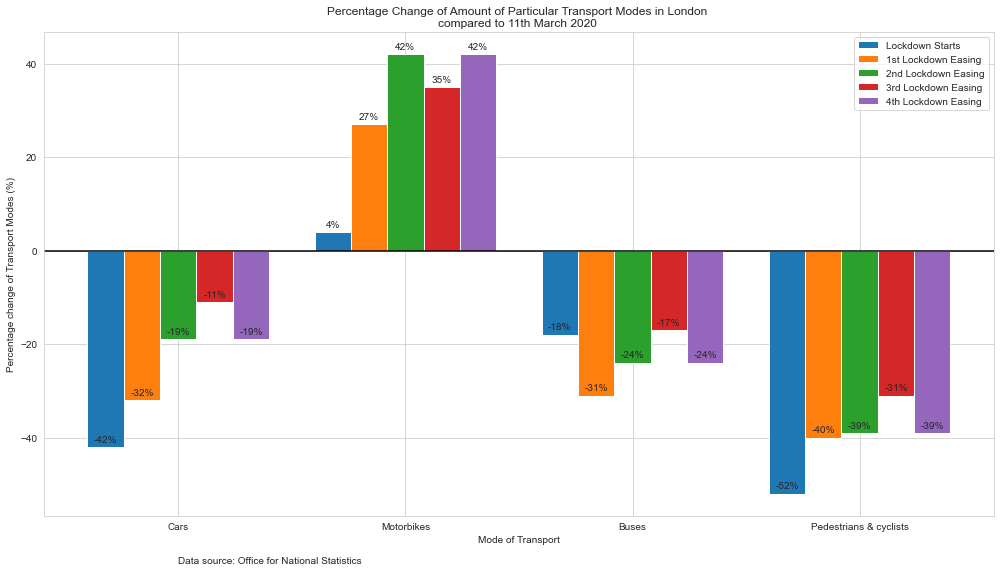

In [21]:
x_vals = np.arange(len(labels))  # the label locations
width = 0.16  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals - width*2, lockdown, width, label='Lockdown Starts')
rects2 = ax.bar(x_vals - width, easing_1, width, label='1st Lockdown Easing')
rects3 = ax.bar(x_vals , easing_2, width, label='2nd Lockdown Easing')
rects4 = ax.bar(x_vals + width, easing_3, width, label='3rd Lockdown Easing')
rects5 = ax.bar(x_vals + width*2, easing_4, width, label='4th Lockdown Easing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Mode of Transport')
ax.set_ylabel('Percentage change of Transport Modes (%)')
ax.set_title('Percentage Change of Amount of Particular Transport Modes in London \ncompared to 11th March 2020 ')
ax.set_xticks(x_vals)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.axhline(y=0, color='black')
plt.text(x_vals[0], -67, "Data source: Office for National Statistics", fontsize=10)

fig.tight_layout()

plt.show()

## What does this show about the traffic in London?

From the start of Lockdown the levels of cars dramatically decreases and then rose again as lockdown restrictions were lifted again, however, still at a lower level than normal. This mirrors the general trend show in the 'Use of Transport Modes in the UK since 1st March 2020' figures. 

Further the levels of of buses has decreased but not at the same rate as cars and has only seen small fluctuations and has not moved back to normal levels. Comparing this to the 'Use of Transport Modes in the UK since 1st March 2020' we can see that Transport for London Buses usage also dropped justifying these results.

More interestingly the levels of motorbikes has increased. This could be due to the increase in food deliveries that people were getting to there home, or could be favoured over other transport modes.

The levels of pedestrians and cyclist dropped the most and has stayed at the biggest percentage decrease. Following on from the increase in motorbikes, London had a larger level of lunches being delivered to offices (easiest on bikes) which still remains low due to offices remaining closed. 

Similarly to previous analysis, even though there is a a general decrease in cars and buses, a sustained decrease in car usage would be greater impactful but this is still a possibililty as there is a reduction. More worryingly, the increase in motorbike usage may counter balance other modes of transport, an increase is always worrying to see if it emmits emmissions. The large drop in office usage may be the reason why bus and car levels have dropped in a heavily corporate city indicating work from homes benefits to road busyness. 

## What effects can these changes in usage and traffic have?

There are many effects that could be found that have resulted from this droping in car and other transport mode usage, two that can be explore are:
- **Fuel Prices**: What impact did the reduced use of cars have on petrol and diesel prices?
- **Co2 Emmissions**: Did this reduction of cars and other vechiles on the road change the production of Co2 (a greenhouse gas) emmissions?

## Fuel Prices

Looking at the [BEIS published road fuel price statistics](https://www.gov.uk/government/statistical-data-sets/oil-and-petroleum-products-weekly-statistics) we can see the retail price for petrol and diesel in the UK. This would be impacted by the demand from users of fuel which decreased during the UK (other factors also apply).

### Import Weekly Fuel Data

In [22]:
fuel_data = pd.read_excel('data/weekly_fuel_prices.xlsx')

### Plot Fuel prices of Petrol and Diesel at the pump

Text(2020-01-02, 100, 'Data source: BEIS')

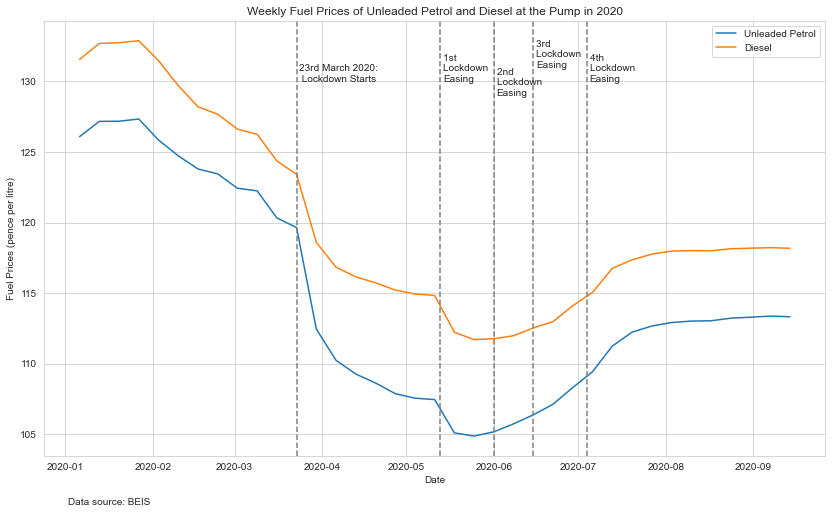

In [23]:
plt.plot(fuel_data['Date'], fuel_data['ULSP'], label='Unleaded Petrol')
plt.plot(fuel_data['Date'], fuel_data['ULSD'], label='Diesel')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 130, '23rd March 2020: \n Lockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 130, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 129, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 131, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 130, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Fuel Prices (pence per litre)')
plt.title("Weekly Fuel Prices of Unleaded Petrol and Diesel at the Pump in 2020")
plt.legend()

plt.text(np.datetime64('2020-01-02'), 100, "Data source: BEIS", fontsize=10)

## How did Fuel prices change?

From before lockdown started the price at the pump of both Petrol and Diesel was reducing, This further reduced as Lockdown started and has been slow to rise. A statement from the [Petrol Retailer Association](https://www.ukpra.co.uk/en/bulletins/71) states that many petrol stations will have to close as fuel sales dry up. Here also states: "Petrol consumption was down by 75% and diesel by 71% which indicates that the Government’s “stay at home” instructions to combat the coronavirus pandemic are being heeded". 

Showing that the demand for fuel most definitely dropped indicating the reduced usage of cars in the lockdown period. 

## Percentage Change in Co2 Emmissions from Surface Transport

As less vehicles were on the road during the lockdown period how did the levels of Co2 emmissions change due to this surface transport. Using data from [The Integrated Carbon Observation System](https://www.icos-cp.eu/gcp-covid19) which reported a teporary reducation in Co2 emmission how much of this was due to surface transport in the UK.

### Import Co2 Change Data

In [24]:
emmission_data = pd.read_excel('data/median_Co2_change_surface_transport.xlsx')

### Plot emmission changes

Text(2020-01-02, -20, 'Data source: The Integrated Carbon Observation System')

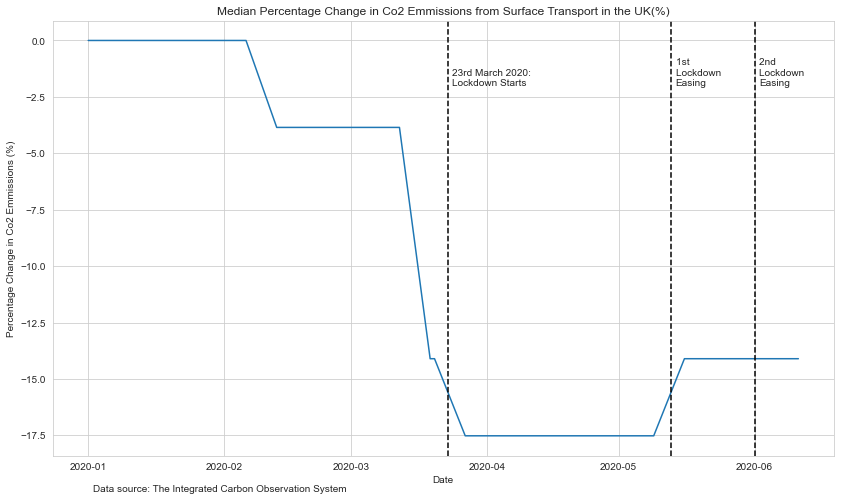

In [25]:
plt.plot(emmission_data['Date'], emmission_data['Surface Transport'])

plt.axvline(x = np.datetime64('2020-03-23'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), -2, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), -2, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), -2, '2nd \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Percentage Change in Co2 Emmissions (%)')
plt.title("Median Percentage Change in Co2 Emmissions from Surface Transport in the UK(%)")

plt.text(np.datetime64('2020-01-02'), -20, "Data source: The Integrated Carbon Observation System", fontsize=10)

## Did surface transport reduce Co2 emmissions?

From the Figure above we can see a reduction of Co2 emmission around the start of Lockdown in the UK highlighting that the reduction of cars and other vehicles may have had an impact in reducing the amount of greenhouse gases emitted in the UK. 

This is an important indication that reducing vehicles on the road will infact reduce emmissions and possible what the UK should push to see.

## How do we ensure that we come out of Lockdown in the most sustainable way when looking at Transport?


**Summary**

As Lockdown eases we can see an increase in the usage of cars again and this has not been seen in public transport, further the reduced fuel prices and the possibility of crowded public transport may lead to more people using their cars more often.

People remaining at home not travelling to work, especially seen in office workers, has highlighted the impact commuting plays in our road transport levels. This reduction that lockdown induce showed the drop in levels of emmission that is gained from reducing our vehicles on the road. Further as office workers stay working from home and possible in the furture remain working from home in some capacity, the country could see a somewhat lower level of vechiles on the road and in turn reducing emmissions.

**The Future**

We need the governement to make public transit safe and not push people away from it completely. This could be a perfect time to expand the public transport in the UK to host larger capacity so we firstly can introduce more saftey and space to limit the spread of COVID-19 as well as future-proofing our public transport network. Further as office workers still mostly remain working from home for the moment it give more opportunity to do so soon.

Additionally the [delaying of Clean Air Zones](https://www.theguardian.com/world/2020/apr/16/uk-cities-postpone-clean-air-zone-plans-due-to-covid-19-crisis) in the UK could delay the reduction of emmissions and car usage we saw in London from happening in other major cities and need to ensure this does take place and not delayed further. Transport emmission are particularly important as [Government](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/862887/2018_Final_greenhouse_gas_emissions_statistical_release.pdf) and [Industry](https://www.energy-uk.org.uk/publication.html?task=file.download&id=6602) reports have highlighted that transport is the largest contributors to our greenhouse gas emmissions. Further, road transport has also been reported to be the main source of air quality pollutant emissions from transport by the [Departement of Transport](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/890898/energy-and-environment-notes.pdf). 

As highlighted above the reduction of cars and other vehicles on the road did lead to a decrease in Co2 emmissions a greenhouse gas. This idicates the push to decrease usage of cars and a greater push to public transport as this is the best way to allow people to travel in a fast and clean way. Therefore in order for the UK to meet its Clean Air Sustainability target the make up of our transport modes need to be looked at. 

The Government plans to ends the sale of new conventional petrol and diesel cars and vans by 2040, however this does not push people to more energy efficient cars such as electric and hybrid cars just second-hand petrol and diesel cars which may not be better for the environment. There needs to be a push and incentives toward purchasing efficient vehicles as if public transport is not improved in the drastic way, cars will remain essential to peoples lives. 